In [15]:
#To convert Tsunami data into a time-series data set.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#reading the dataset Task 1
df_first = pd.read_csv("TsunamiData - 20220109.csv", usecols= [1,13])

In [17]:
df_Top_five = df_first.groupby(["Country"]).size().sort_values(ascending=False).reset_index()
df_Top_five = df_Top_five.rename(columns={0: 'Count'})
df_Top_five = df_Top_five.head(5)
#Task 2 (5 countries which had the most Tsunamis in descending order)
df_Top_five

,Country,Count
0,JAPAN,362
1,USA,271
2,INDONESIA,258
3,GREECE,177
4,CHILE,168


In [18]:
df_Top_five = pd.DataFrame(df_Top_five)
#Creating Empty dataFrame Start of Task 3
df4 = pd.DataFrame(columns=['Year',df_Top_five.iat[0,0],df_Top_five.iat[1,0],df_Top_five.iat[2,0],df_Top_five.iat[3,0],df_Top_five.iat[4,0]])

In [19]:
#Implementing control-break logic
start=1500
yearid=1
while start<=2022:    
    df4.at[yearid,'Year']=start
    for inda in df_Top_five.index:
        count=0
        for ind in df_first.index:
            if df_first.iat[ind,0]>=start  and df_first.iat[ind,0]<=start+25 and df_first.iat[ind,1] == df_Top_five.iat[inda,0]:
                count = count+1
        df4.at[yearid, df_Top_five.iat[inda,0]]=count
    start=start+25
    yearid=yearid+1

In [20]:
#Task 3 Output Table years,countries and their count
df4

,Year,JAPAN,USA,INDONESIA,GREECE,CHILE
1,1500,6,1,0,1,0
2,1525,1,1,0,0,0
3,1550,2,0,0,1,3
4,1575,5,0,0,1,1
5,1600,10,0,1,5,1
6,1625,7,0,4,7,1
7,1650,10,1,7,5,2
8,1675,14,1,2,1,3
9,1700,13,1,4,2,1
10,1725,7,0,0,5,3


In [21]:
#converting dataframe values to integer
df4["Year"] = df4["Year"].astype(str).astype(int)
df4["JAPAN"] = df4["JAPAN"].astype(str).astype(int)
df4["USA"] = df4["USA"].astype(str).astype(int)
df4["INDONESIA"] = df4["INDONESIA"].astype(str).astype(int)
df4["GREECE"] = df4["GREECE"].astype(str).astype(int)
df4["CHILE"] = df4["CHILE"].astype(str).astype(int)

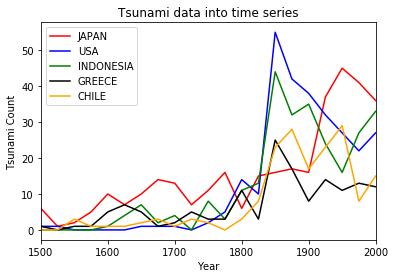

In [22]:
#Plotting of the chart
ax = plt.gca()
df4.plot(kind='line',x='Year',y='JAPAN',color='red',ax=ax)
df4.plot(kind='line',x='Year',y='USA',color='blue',ax=ax)
df4.plot(kind='line',x='Year',y='INDONESIA',color='green',ax=ax)
df4.plot(kind='line',x='Year',y='GREECE',color='black',ax=ax)
df4.plot(kind='line',x='Year',y='CHILE',color='orange',ax=ax)
ax.set(title='Tsunami data into time series', ylabel='Tsunami Count', xlabel='Year')
ax.legend(loc='best')
# showing the plot Task 4
plt.show()